In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

In [68]:
## leemos los datos
df=pd.read_csv('data.csv');
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [69]:
df.shape

(301, 9)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [71]:
df.describe(include='all')

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


In [72]:
# Removemos la columna Car_Name
df.drop(columns='Car_Name',inplace=True)
df.drop(columns='Fuel_Type',inplace=True)
df.drop(columns='Seller_Type',inplace=True)
df.drop(columns='Transmission',inplace=True)
df.drop(columns='Year',inplace=True)

In [73]:
df

,Selling_Price,Present_Price,Kms_Driven,Owner
0,3.35,5.59,27000,0
1,4.75,9.54,43000,0
2,7.25,9.85,6900,0
3,2.85,4.15,5200,0
4,4.60,6.87,42450,0
...,...,...,...,...
296,9.50,11.60,33988,0
297,4.00,5.90,60000,0
298,3.35,11.00,87934,0
299,11.50,12.50,9000,0


In [74]:
#maximum=2024
#Age=df['Year'].apply(lambda x:(maximum+1)-x)
#df.drop('Year',axis=1,inplace=True)
#df.insert(0,'Age',Age);df

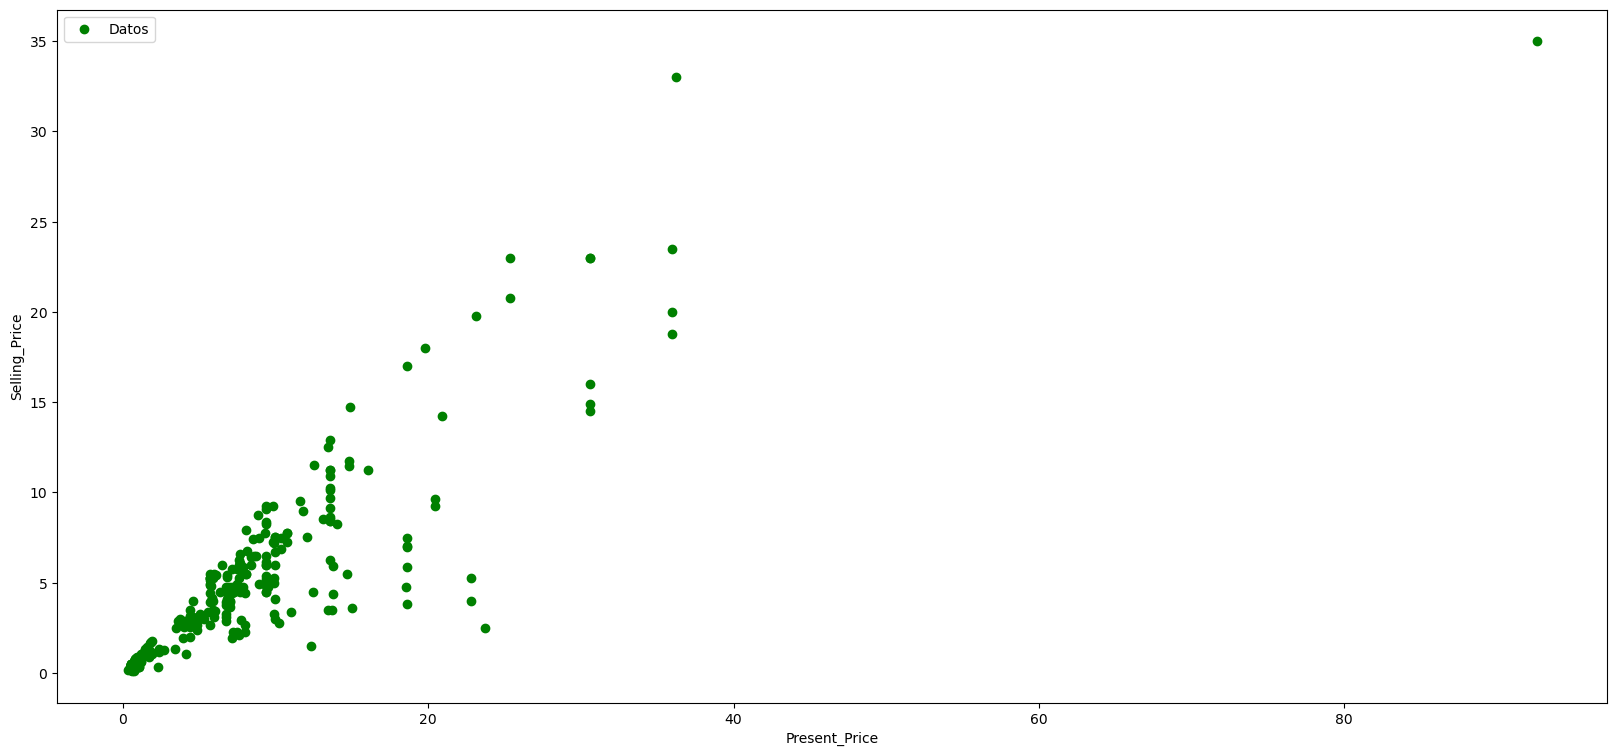

In [75]:
plt.scatter (df['Present_Price'],df['Selling_Price'], color='green', label='Datos')
plt.rcParams ['figure.figsize'] = (20,9)
plt.xlabel('Present_Price')
plt.ylabel ('Selling_Price')
plt.legend()
plt.show()

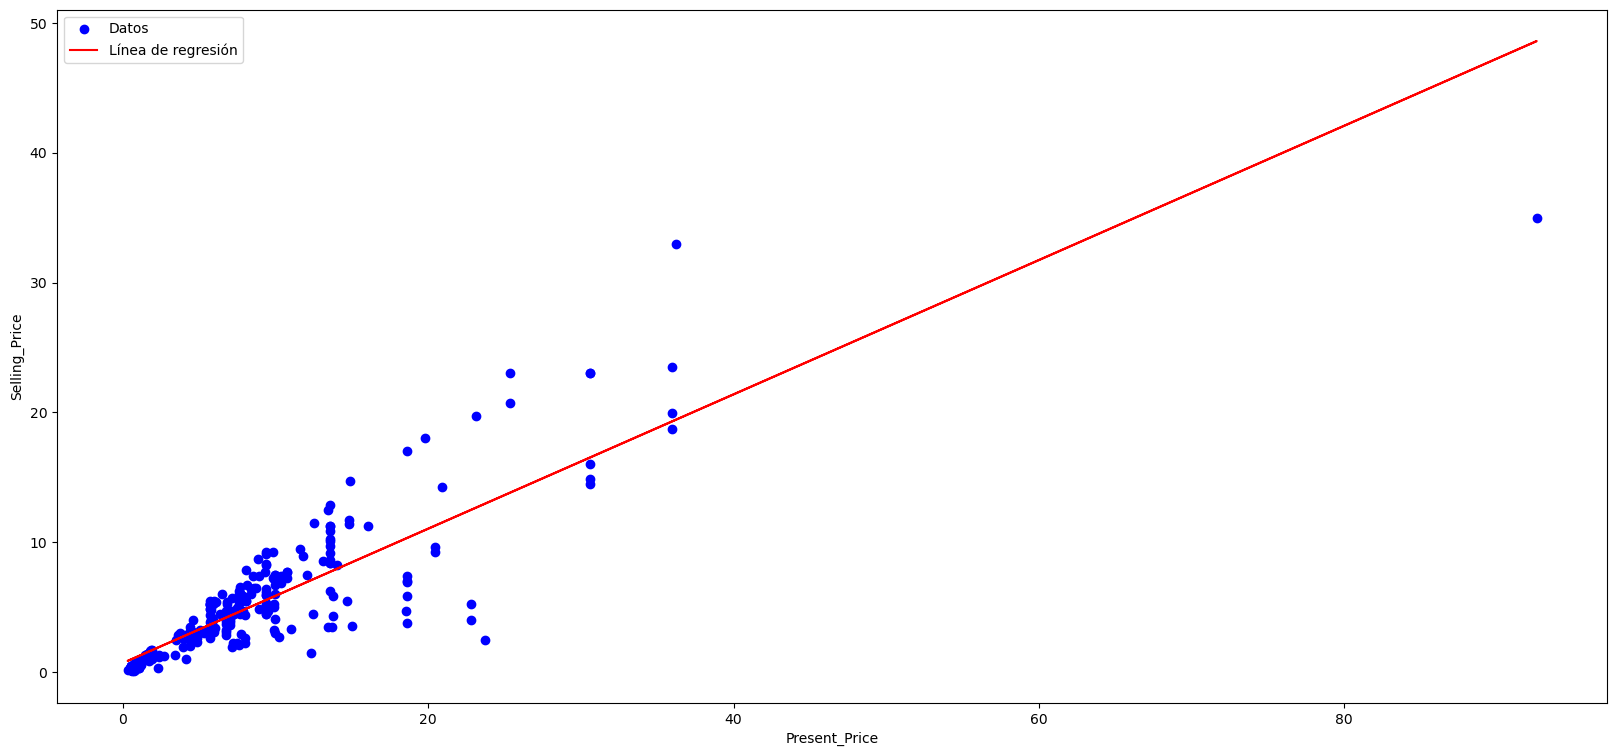

 La ecuación de la recta es: Y = 0.7185274709817593 + 0.5168490273953977*×

 Error Cuadrático Medio (MSE) : 5.855089487051358

 Raíz del Error Cuadrático Medio (RMSE) : 2.4197292177124607

 Error Absoluto Medio (MAE) : 1.4778880466892308

 EL Coeficiente de Determinación (R2) : 0.7726103146985799


In [76]:

X = np.array(df[['Present_Price']])
Y = df['Selling_Price'].values
modelo = LinearRegression()
modelo.fit(X,Y)
# Graficar los datos y la línea de regresión
plt.scatter (X, Y, color='blue', label='Datos')
plt.plot(X, modelo.predict (X), color='red', label='Línea de regresión')
plt.rcParams ['figure.figsize'] = (20,9)
plt.xlabel('Present_Price')
plt.ylabel ('Selling_Price')
plt.legend()
plt.show()
print(f" La ecuación de la recta es: Y = {modelo.intercept_} + {modelo.coef_[0]}*×")
# Predecir los valores de Y usando el modelo
Y_pred = modelo.predict(X)
# Calcular las métricas
mse = mean_squared_error(Y, Y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y, Y_pred)
r2 = r2_score(Y, Y_pred)
# Imprimir las métricas
print()
print(f" Error Cuadrático Medio (MSE) : {mse}")
print()
print(f" Raíz del Error Cuadrático Medio (RMSE) : {rmse}")
print()
print(f" Error Absoluto Medio (MAE) : {mae}")
print()
print(f" EL Coeficiente de Determinación (R2) : {r2}")
df['pred'] = Y_pred
df['diff'] = df['pred']-df['Selling_Price']
df['cuad'] = df['diff']**2


In [77]:
df

,Selling_Price,Present_Price,Kms_Driven,Owner,pred,diff,cuad
0,3.35,5.59,27000,0,3.607714,0.257714,0.066416
1,4.75,9.54,43000,0,5.649267,0.899267,0.808681
2,7.25,9.85,6900,0,5.809490,-1.440510,2.075068
3,2.85,4.15,5200,0,2.863451,0.013451,0.000181
4,4.60,6.87,42450,0,4.269280,-0.330720,0.109376
...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,6.713976,-2.786024,7.761929
297,4.00,5.90,60000,0,3.767937,-0.232063,0.053853
298,3.35,11.00,87934,0,6.403867,3.053867,9.326102
299,11.50,12.50,9000,0,7.179140,-4.320860,18.669828


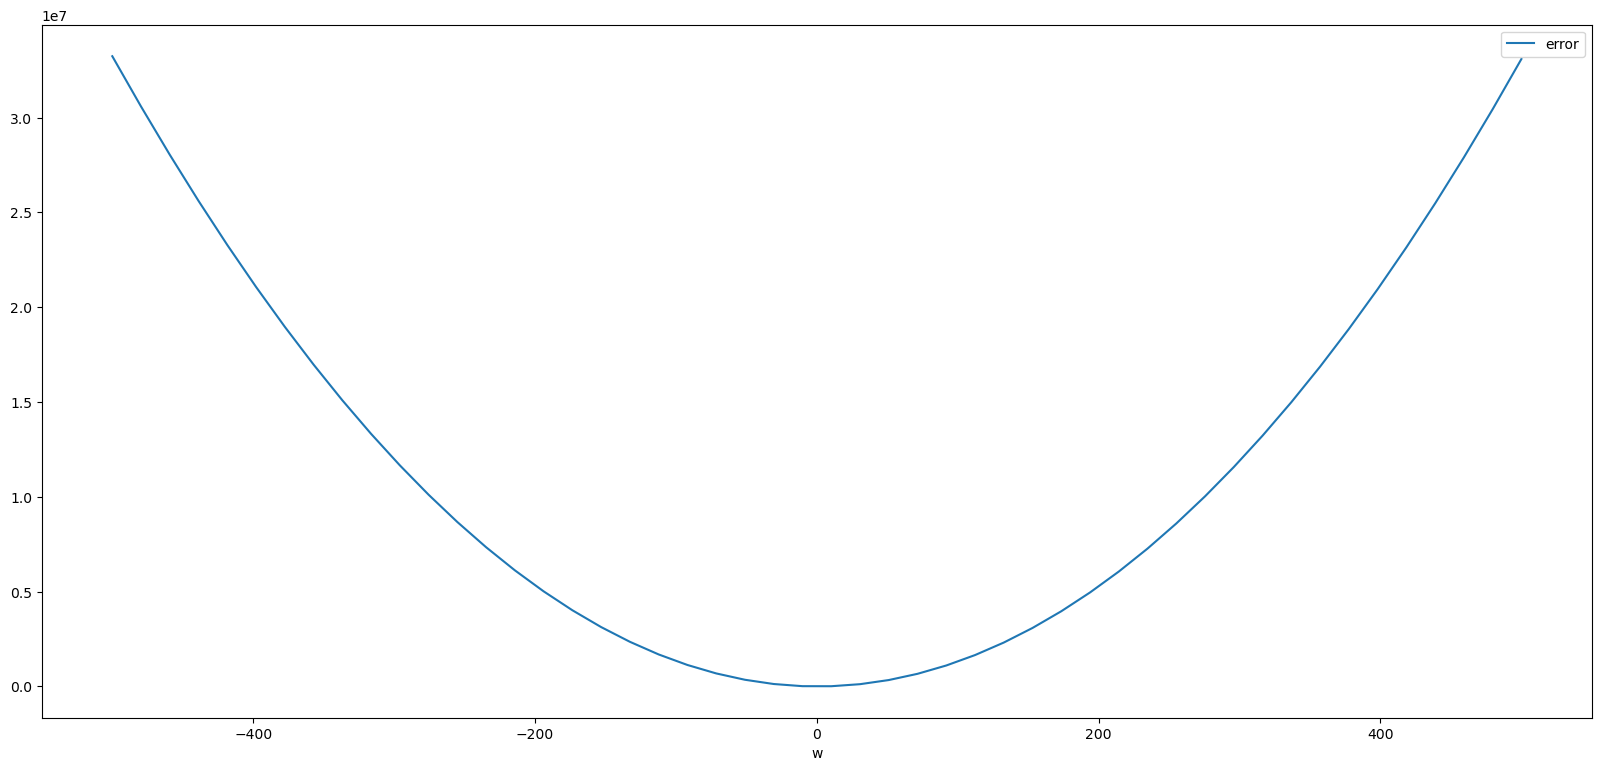

In [78]:
def sum_error(w, train):
    b=0
    train['pred'] = train['Present_Price']*w+b
    train['diff'] = train['pred']-train['Selling_Price']
    train['cuad'] = train['diff']**2
    return(train['cuad'].mean())

# grid de la funcion de error basado en m, b=0
w = np.linspace(-500,500)
grid_error = pd.DataFrame(w, columns=['w'])
grid_error.head()
train = df
grid_error['error']=grid_error['w'].apply(lambda x: sum_error(x, train=train))
grid_error.head()
grid_error.plot(x='w',y='error')
plt.show()

In [79]:

# definiendo input y output
X_train = np.array(train['Present_Price']).reshape((-1, 1))
Y_train = np.array(train['Selling_Price'])

# creando modelo
model = LinearRegression(fit_intercept=False)
model.fit(X_train, Y_train)

# imprimiendo parametros
print(f"intercepto (b): {model.intercept_}")
print(f"pendiente (w): {model.coef_}")

intercepto (b): 0.0
pendiente (w): [0.55816529]
